In [ ]:
# Diego Esteban Zepeda Ceballos
# A01026512

# Clasificación multiclase con redes neuronales en Keras
___

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [3]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Explorar el dataset

#### Conjunto de entrenamiento

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

#### Conjunto de prueba

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

#### Visualizando una instancia

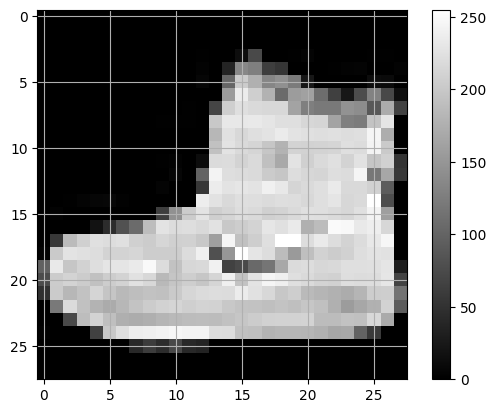

In [8]:
# Visualizar la imagen en escala de grises
plt.figure()
plt.imshow(X_train_full[0], cmap='gray')
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [9]:
y_train_full[0]

9

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

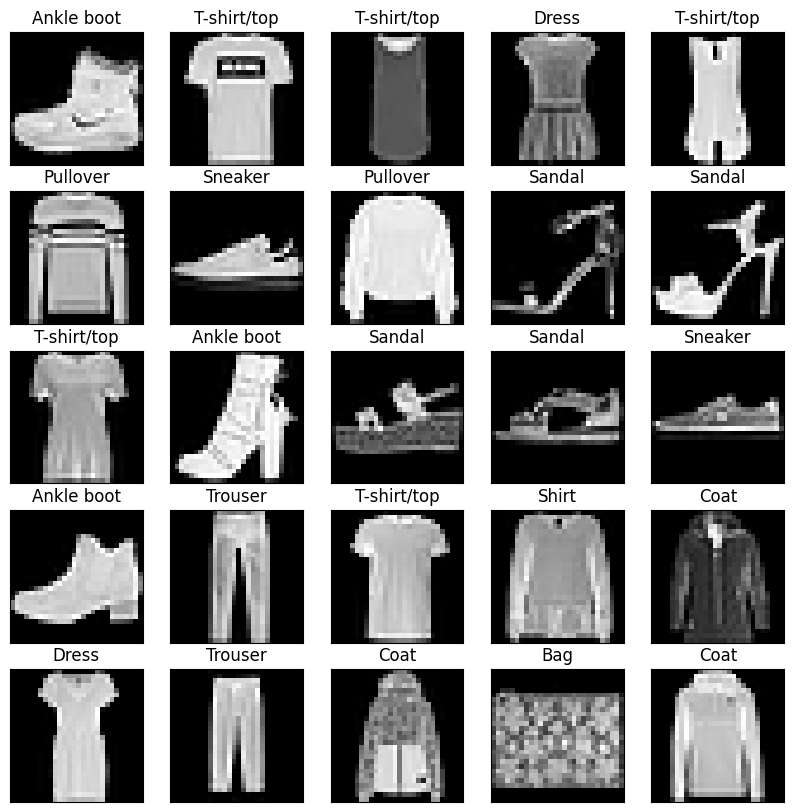

In [12]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [14]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [15]:
X_train_full = X_train_full / 255
X_test = X_test / 255

In [16]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [17]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [18]:
X_validation.shape

(5000, 28, 28)

In [19]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [20]:
from tensorflow.keras import layers
from keras import models

model = keras.models.Sequential()
# Convolutional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Dense
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

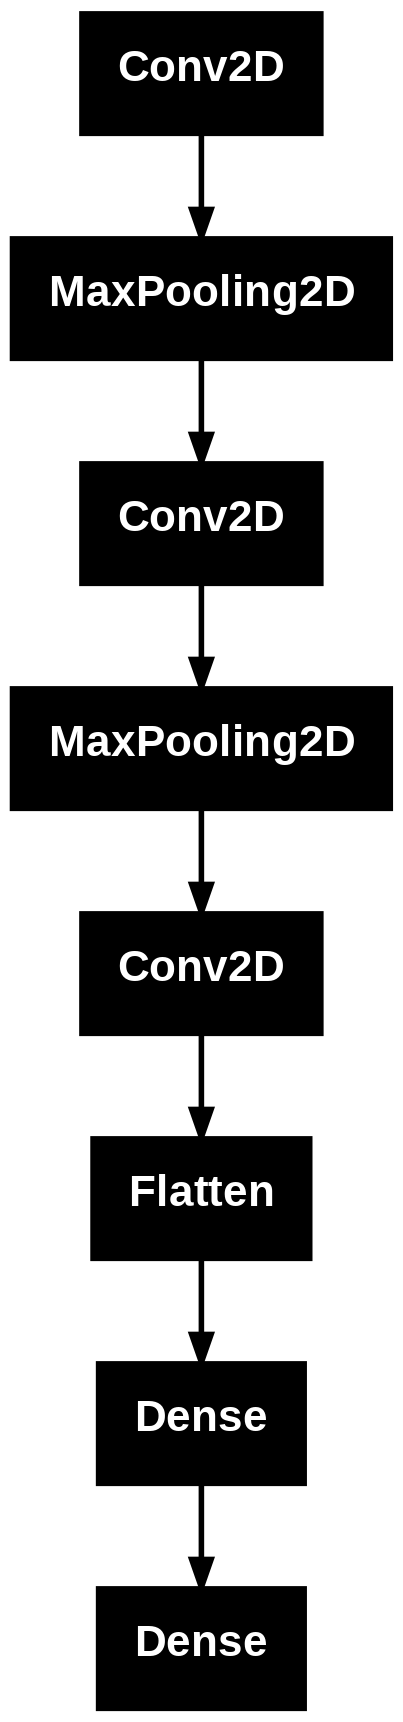

In [22]:
keras.utils.plot_model(model)

In [23]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [24]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [25]:
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [27]:
history = model.fit(X_train,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_validation,validation_labels))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4919 - loss: 1.4275 - val_accuracy: 0.7748 - val_loss: 0.6203
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7754 - loss: 0.6038 - val_accuracy: 0.8062 - val_loss: 0.5140
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8131 - loss: 0.5055 - val_accuracy: 0.8308 - val_loss: 0.4613
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8395 - loss: 0.4481 - val_accuracy: 0.8444 - val_loss: 0.4184
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8474 - loss: 0.4233 - val_accuracy: 0.8486 - val_loss: 0.4113
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8583 - loss: 0.3905 - val_accuracy: 0.8656 - val_loss: 0.3717
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8686 - loss: 0.3637 - val_accuracy: 0.8702 - val_loss: 0.3652
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8713 - loss: 0.3538 -

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [28]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [29]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
history.history

{'accuracy': [0.6398727297782898,
  0.7863636612892151,
  0.8202545642852783,
  0.8402727246284485,
  0.8511090874671936,
  0.8605090975761414,
  0.8674727082252502,
  0.8717818260192871,
  0.8782727122306824,
  0.8812545537948608],
 'loss': [0.9878721833229065,
  0.5706851482391357,
  0.4896430969238281,
  0.44433721899986267,
  0.411632776260376,
  0.38674649596214294,
  0.3674539029598236,
  0.3517846167087555,
  0.33870401978492737,
  0.32663965225219727],
 'val_accuracy': [0.7748000025749207,
  0.8062000274658203,
  0.8307999968528748,
  0.8443999886512756,
  0.8485999703407288,
  0.8655999898910522,
  0.870199978351593,
  0.8694000244140625,
  0.8712000250816345,
  0.8640000224113464],
 'val_loss': [0.6203387975692749,
  0.5139849185943604,
  0.4613499045372009,
  0.418439120054245,
  0.41127437353134155,
  0.371654748916626,
  0.3652257025241852,
  0.3480217456817627,
  0.35638484358787537,
  0.3639638423919678]}

#### Curvas de aprendizaje

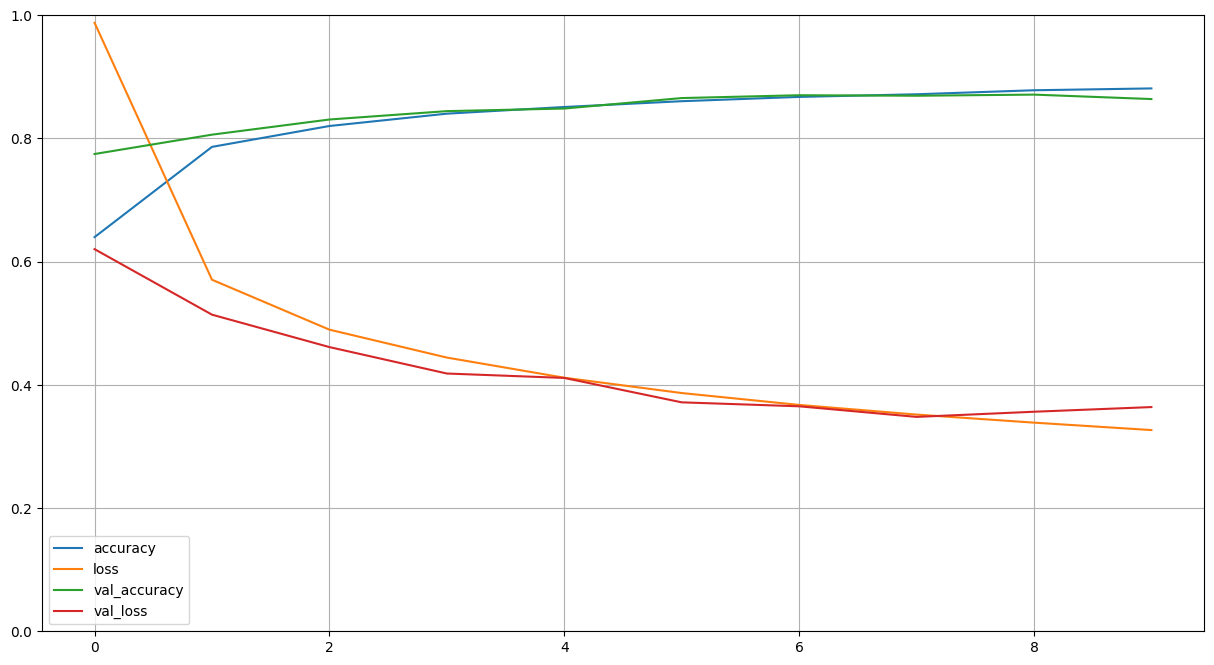

In [31]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     train_labels,
                     epochs=15,
                     batch_size=32,
                     validation_data=(X_validation,validation_labels),
                     initial_epoch= 10)

Epoch 11/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8820 - loss: 0.3210 - val_accuracy: 0.8804 - val_loss: 0.3341
Epoch 12/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3070 - val_accuracy: 0.8798 - val_loss: 0.3296
Epoch 13/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8916 - loss: 0.2962 - val_accuracy: 0.8838 - val_loss: 0.3178
Epoch 14/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2852 - val_accuracy: 0.8766 - val_loss: 0.3224
Epoch 15/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.2786 - val_accuracy: 0.8864 - val_loss: 0.3025


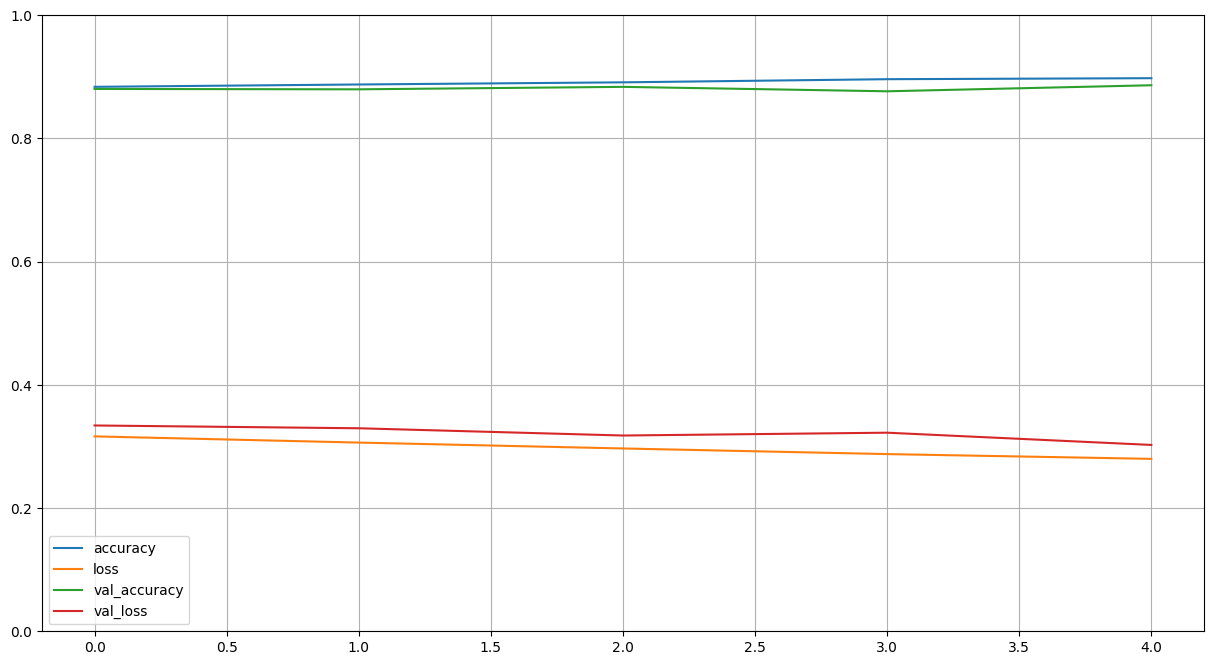

In [34]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [35]:
loss_and_metrics = model.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.3225


# Predicción en nuevos datos

In [36]:
X_new = X_test[:10]

#### Probabilidad estimada por clase

In [37]:
y_proba = model.predict(X_new).round(2)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.03, 0.01, 0.03, 0.  , 0.59, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.53, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
# Convertir probabilidades en clases (el índice de la clase con mayor probabilidad)
y_pred = np.argmax(y_proba, axis=1)

print(y_pred)

[9 2 1 1 6 1 4 6 5 7]


#### Clase con mayor probabilidad

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In [40]:
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


# Guardar y restaurar el modelo

#### Guardar modelo

In [41]:
model.save('keras_fashion.keras') #En formato HDF5


#### Restaurar un modelo

In [42]:
model = keras.models.load_model('keras_fashion.keras')

In [43]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.03, 0.01, 0.03, 0.  , 0.59, 0.  , 0.  , 0.  ]],
      dtype=float32)

1. Modifica el modelo par alcanzar un accuracy mayor al 92% pero evitando que suceda el sobreajuste.
2. En lugar de la red personalizada, utiliza un arquitectura de red más compleja como ResNet o VGG.

## 1

In [45]:
from tensorflow.keras import layers, regularizers

In [47]:
model = keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_train,
                    train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_validation, validation_labels),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.7924 - loss: 2.6595 - val_accuracy: 0.8632 - val_loss: 0.7901
Epoch 2/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8836 - loss: 0.7026 - val_accuracy: 0.8790 - val_loss: 0.6953
Epoch 3/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8904 - loss: 0.6771 - val_accuracy: 0.8976 - val_loss: 0.6226
Epoch 4/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9000 - loss: 0.6409 - val_accuracy: 0.9114 - val_loss: 0.6131
Epoch 5/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9047 - loss: 0.6066 - val_accuracy: 0.9118 - val_loss: 0.5624
Epoch 6/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9111 - loss: 0.5819 - val_accuracy: 0.9246 - val_loss: 0.4942
Epoch 7/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9156 - loss: 0.5535 - val_accuracy: 0.9182 - val_loss: 0.5676
Epoch 8/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9147 - loss: 0.5673 - 

In [51]:
test_loss, test_acc = model.evaluate(X_test, test_labels)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9206 - loss: 0.5236
Test accuracy: 0.92


## 2

In [52]:
from tensorflow.keras.applications import VGG16

In [54]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [55]:
for layer in base_model.layers:
    layer.trainable = False

In [72]:
model = keras.models.Sequential([
    layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1)),
    layers.Lambda(lambda x: tf.image.resize(x, (32, 32))),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history_vgg = model.fit(X_train,
                        train_labels,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_validation, validation_labels),
                        callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6899 - loss: 0.8899 - val_accuracy: 0.8300 - val_loss: 0.4694
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8219 - loss: 0.4895 - val_accuracy: 0.8440 - val_loss: 0.4250
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8357 - loss: 0.4475 - val_accuracy: 0.8504 - val_loss: 0.4015
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8452 - loss: 0.4211 - val_accuracy: 0.8584 - val_loss: 0.3940
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8538 - loss: 0.3968 - val_accuracy: 0.8570 - val_loss: 0.3835
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8559 - loss: 0.3946 - val_accuracy: 0.8602 - val_loss: 0.3739
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8589 - loss: 0.3808 - val_accuracy: 0.8668 - val_loss: 0.3703
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8639 - loss: 0.3713 - va

In [58]:
test_loss_vgg, test_acc_vgg = model.evaluate(X_test, test_labels)
print(f"VGG16 Test accuracy: {test_acc_vgg:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8732 - loss: 0.3504
VGG16 Test accuracy: 0.8722


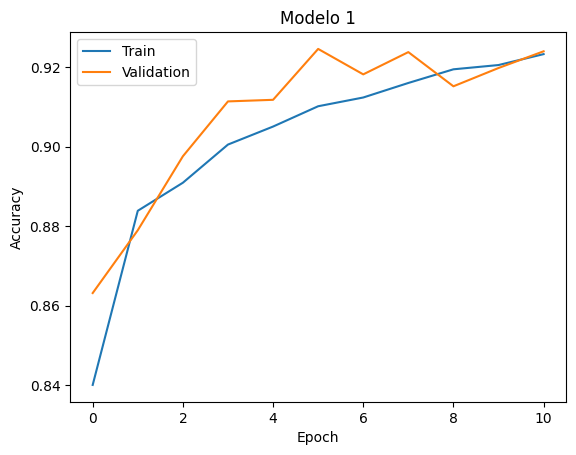

In [71]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Modelo 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

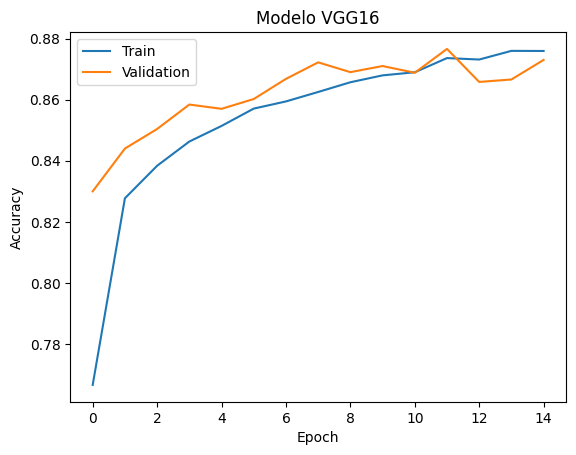

In [70]:
pd.DataFrame(history_vgg.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Modelo VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])